In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Load Data
df_raw = pd.read_csv('Train.csv')
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])
df_raw.set_index('date_time', inplace=True)

In [3]:
# Checking for Stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(df_raw['traffic_volume'])

ADF Statistic: -23.779660
p-value: 0.000000
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [4]:
# If p-value is > 0.05, you might have to difference the series
# E.g.: df_raw['traffic_volume'] = df_raw['traffic_volume'].diff().dropna()

# Train-Test Split
traffic_volume_series = df_raw['traffic_volume']
train_size = int(len(traffic_volume_series) * 0.8)
train, test = traffic_volume_series[0:train_size], traffic_volume_series[train_size:]

In [5]:
# ARIMA Model 
# (You might need to adjust order based on your data characteristics)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
# Forecast
forecast_series = model_fit.forecast(steps=len(test))
forecast = forecast_series.values

C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Nadim Pramono\PycharmProjects\pythonProject1\v392\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2784.379


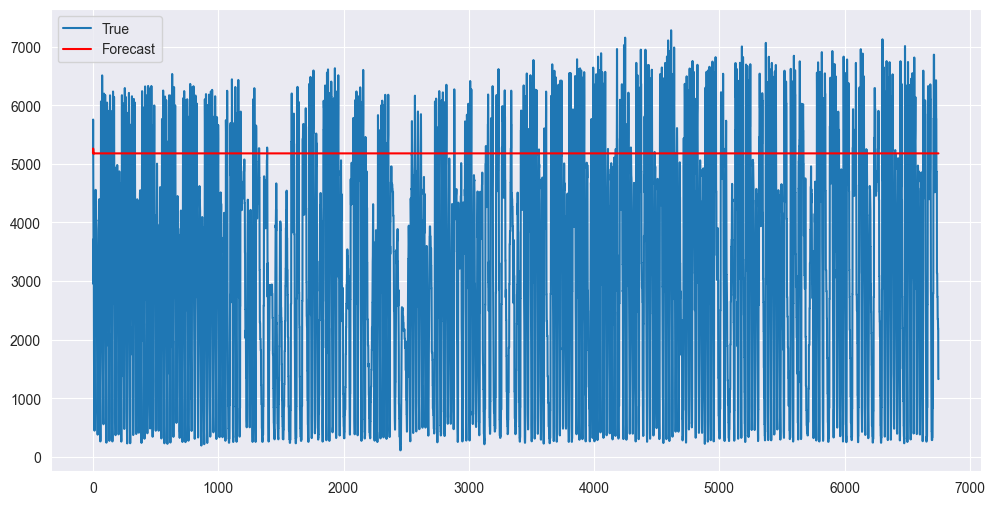

In [8]:

# Plot the real vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test.values, label='True')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.show()